In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("transformed_Housing_Prices.csv")

In [3]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [4]:
s=data['Sale_Price'].head(30)
f=data['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({'Sale_Price':s,'Flat_area':f})

In [5]:
sample_data.head(30)

,Sale_Price,Flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


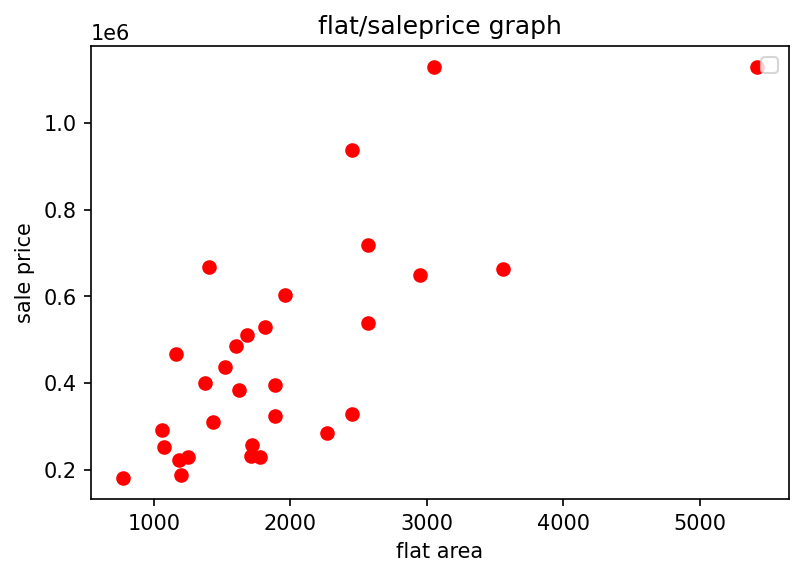

In [6]:
plt.figure(dpi=150)
plt.scatter(sample_data.Flat_area,sample_data.Sale_Price,color="red")
plt.xlabel('flat area')
plt.ylabel("sale price")
plt.title("flat/saleprice graph")
plt.legend()
plt.show()

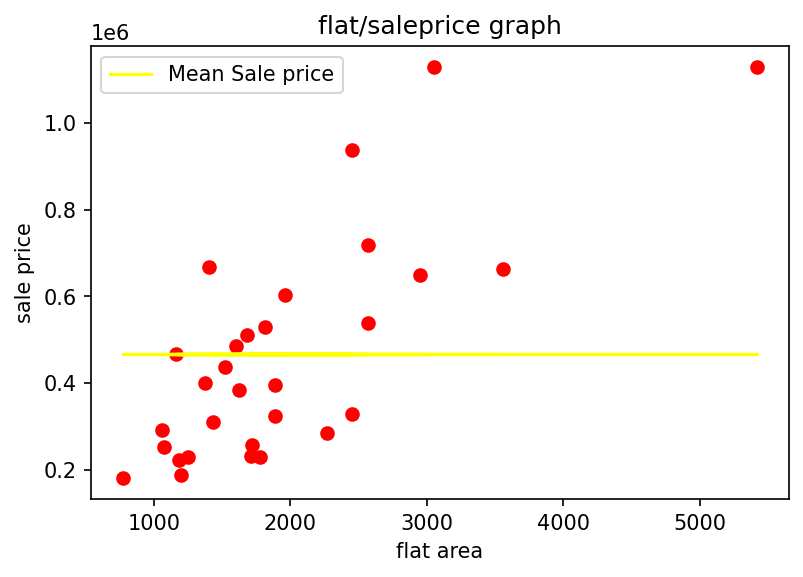

In [7]:
sample_data['mean_sale']=sample_data.Sale_Price.mean()


plt.figure(dpi=150)
plt.scatter(sample_data.Flat_area,sample_data.Sale_Price,color="red")
plt.plot(sample_data.Flat_area,sample_data.mean_sale,color="yellow",label='Mean Sale price')
plt.xlabel('flat area')
plt.ylabel("sale price")
plt.title("flat/saleprice graph")
plt.legend()
plt.show()

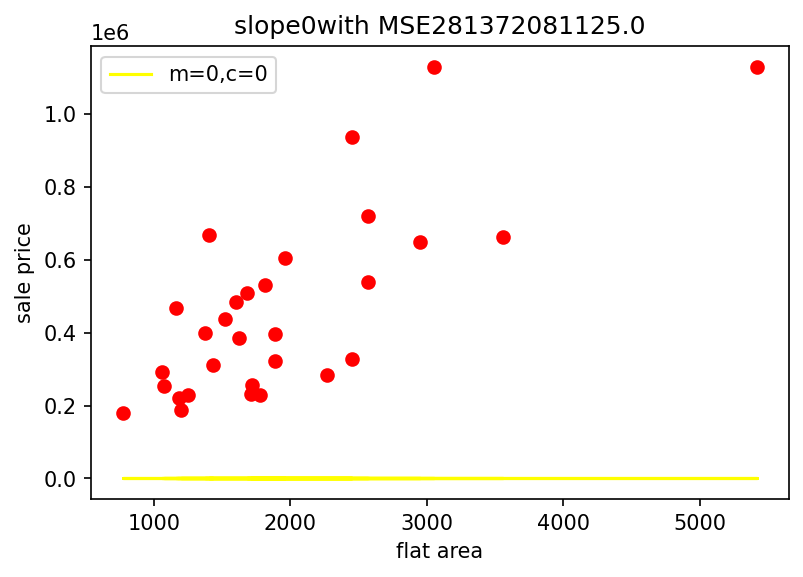

In [8]:
from sklearn.metrics import mean_squared_error as mse

c=0
m=0
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.Flat_area[i]*m+c)
    
plt.figure(dpi=150)
plt.scatter(sample_data.Flat_area,sample_data.Sale_Price,color="red")
plt.plot(sample_data.Flat_area,line,color="yellow",label='m=0,c=0')
plt.xlabel('flat area')
plt.ylabel("sale price")
plt.legend()
MSE=mse(sample_data.Sale_Price,line)
plt.title("slope"+str(m) +"with MSE"+str(MSE))


plt.show()

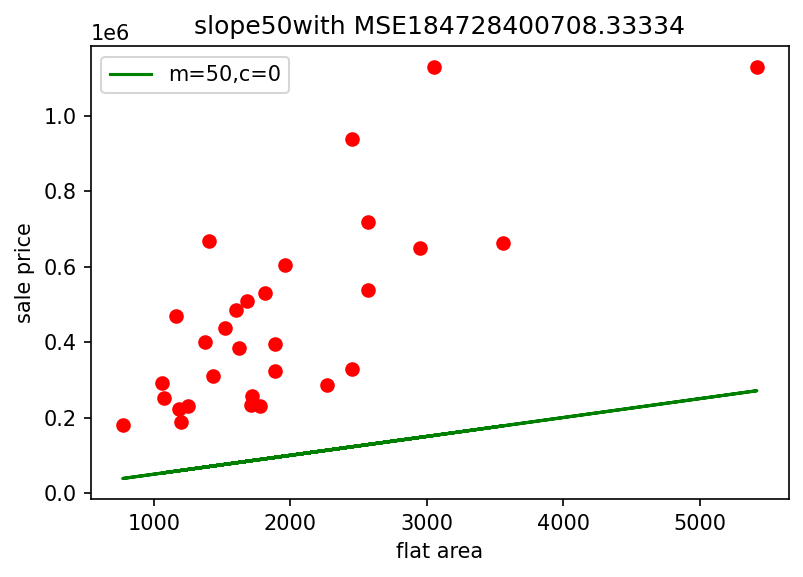

In [9]:
c=0
m=50
line=[]
for i in range(len(sample_data)):
    line.append(sample_data.Flat_area[i]*m+c)
    
plt.figure(dpi=150)
plt.scatter(sample_data.Flat_area,sample_data.Sale_Price,color="red")
plt.plot(sample_data.Flat_area,line,color="green",label='m=50,c=0')
plt.xlabel('flat area')
plt.ylabel("sale price")
plt.legend()
MSE=mse(sample_data.Sale_Price,line)
plt.title("slope"+str(m) +"with MSE"+str(MSE))


plt.show()

In [10]:
def slope_error(slope,intercept,sample_data):
    sale=[]
    for i in range(len(sample_data.Flat_area)):
        sale.append(sample_data.Flat_area[i]*slope+intercept)
    MSE=mse(sample_data.Sale_Price,sale)
    return MSE

In [11]:
slope=[i/10 for i in range(0,5000)]
cost=[]
for i in slope:
    c=slope_error(slope=i,intercept=0,sample_data = sample_data)
    cost.append(c)

In [12]:
#creat a dataframe for cost fun data
Cost_table=pd.DataFrame({'slope':slope,'cost':cost})
Cost_table.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


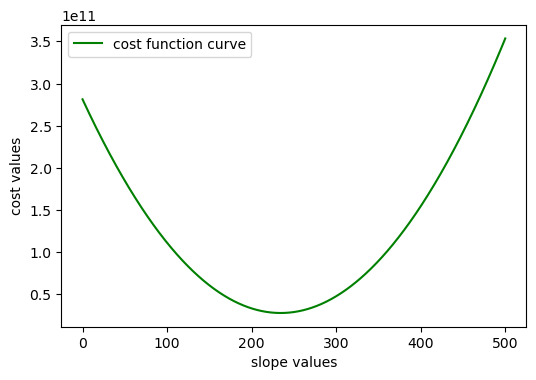

In [13]:
plt.figure(dpi=100)
plt.plot(Cost_table.slope,Cost_table.cost,color="green",label='cost function curve')
plt.xlabel('slope values')
plt.ylabel("cost values")
plt.legend()
plt.show()

In [14]:
Cost_table['slope'][Cost_table.cost==min(Cost_table.cost)]

2343    234.3
Name: slope, dtype: float64

In [15]:
def intercept_error(slope,intercept,sample_data):
    sale=[]
    for i in range(len(sample_data.Flat_area)):
        sale.append(sample_data.Flat_area[i]*slope+intercept)
    MSE=mse(sample_data.Sale_Price,sale)
    return MSE

In [16]:
intercept=[i for i in range(5000,50000)]
cost=[]
for i in intercept:
    c=intercept_error(slope=234,intercept=i,sample_data = sample_data)
    cost.append(c)

In [17]:
#creat a dataframe for cost fun data
Cost_table1=pd.DataFrame({'intercept':intercept,'cost':cost})
Cost_table1.tail()

,intercept,cost
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10
44999,49999,2.929894e+10


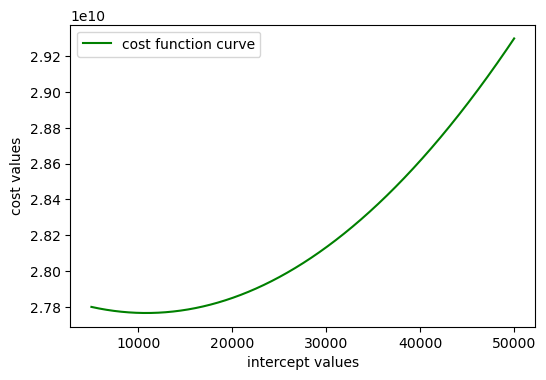

In [18]:
plt.figure(dpi=100)
plt.plot(Cost_table1.intercept,Cost_table1.cost,color="green",label='cost function curve')
plt.xlabel('intercept values')
plt.ylabel("cost values")
plt.legend()
plt.show()

In [19]:
Cost_table1['intercept'][Cost_table1.cost==min(Cost_table1.cost)]

5834    10834
Name: intercept, dtype: int64

# gradient decent algorithm implimentation in python

In [20]:
def param_init(Y):
    """Y=target value initialized m , c value"""
    m=0.1
    c=Y.mean()
    return m , c
    

In [21]:
def generate_predictions(m,c,X):
    # X is the independent variable
    #return preditions generated by line with m and c
    predition=[]
    for x in X:
        pred = (x*m) + c
        predition.append(pred)
    return predition

In [22]:
def compute_cost(predition,Y):
    """return the mean_squared_error b/w predition and Y"""
    cost=np.sum(((predition-Y)**2)/len(Y))
    return cost


In [23]:
def gradients(predition,X,Y):
    #return gradients corresponding to c,m
    n=len(Y)
    Gm=(2/n)*np.sum((predition-Y)*X)
    Gc=(2/n)*np.sum((predition-Y))
    return Gm,Gc

In [24]:
def param_update(m_old,c_old,Gm_old,Gc_old,alpha):
    #for weight updation
    m_new=m_old -(alpha*Gm_old)
    c_new=c_old -(alpha*Gc_old)
    return m_new,c_new


In [25]:
def result(m,c,X,Y,cost,preditions,i):
    """print and plot finalr result obtained from gradient decent"""
    
    ##if the gradient decent conversed to the optimal value before max_iter
    if i< max_iter-1:
        print("******Gradient decent has conversed at the iteration {}*****".format(i))
    else:
        print("*****Result after",max_iter,"iteration is*****")
    #plotting the final result
    plt.figure(figsize=(14,7),dpi=120)
    plt.scatter(X,Y,color="red",label="data points")
    label="final regression line ;m {};c {}".format(str(m),str(c))
    plt.plot(X,preditions,color="green",label=label)
    plt.xlabel('flat area')
    plt.ylabel("sale price")
    plt.title("final regression line")
    plt.legend()
    plt.show()


After Iteration 0 :m= 0.11364711772269974 ;C= 1.141309269314661e-16 ;cost= 0.85836535863667
After Iteration 20 :m= 0.3470353076479252 ;C= 5.2661578801386635e-17 ;cost= 0.6025757137100908
After Iteration 40 :m= 0.5189693653807629 ;C= 1.913284345770691e-17 ;cost= 0.48598999837300416
After Iteration 60 :m= 0.6456309596026035 ;C= 1.4247862149356619e-18 ;cost= 0.4390970213220899
After Iteration 80 :m= 0.7389409161194623 ;C= -8.881784197001208e-18 ;cost= 0.4257140346892883
After Iteration 100 :m= 0.807681152958174 ;C= -1.5894692969216778e-17 ;cost= 0.4273399954157772
After Iteration 120 :m= 0.8583211954255436 ;C= -1.9706458687096484e-17 ;cost= 0.43477083715848364
After Iteration 140 :m= 0.8956270590511523 ;C= -2.2259971643734338e-17 ;cost= 0.44362774937289756
After Iteration 160 :m= 0.9231098057678296 ;C= -2.2944609175586516e-17 ;cost= 0.4519883436158959
After Iteration 180 :m= 0.943355989442145 ;C= -2.2963112892663597e-17 ;cost= 0.4591437999209089
After Iteration 200 :m= 0.9582710908182887 

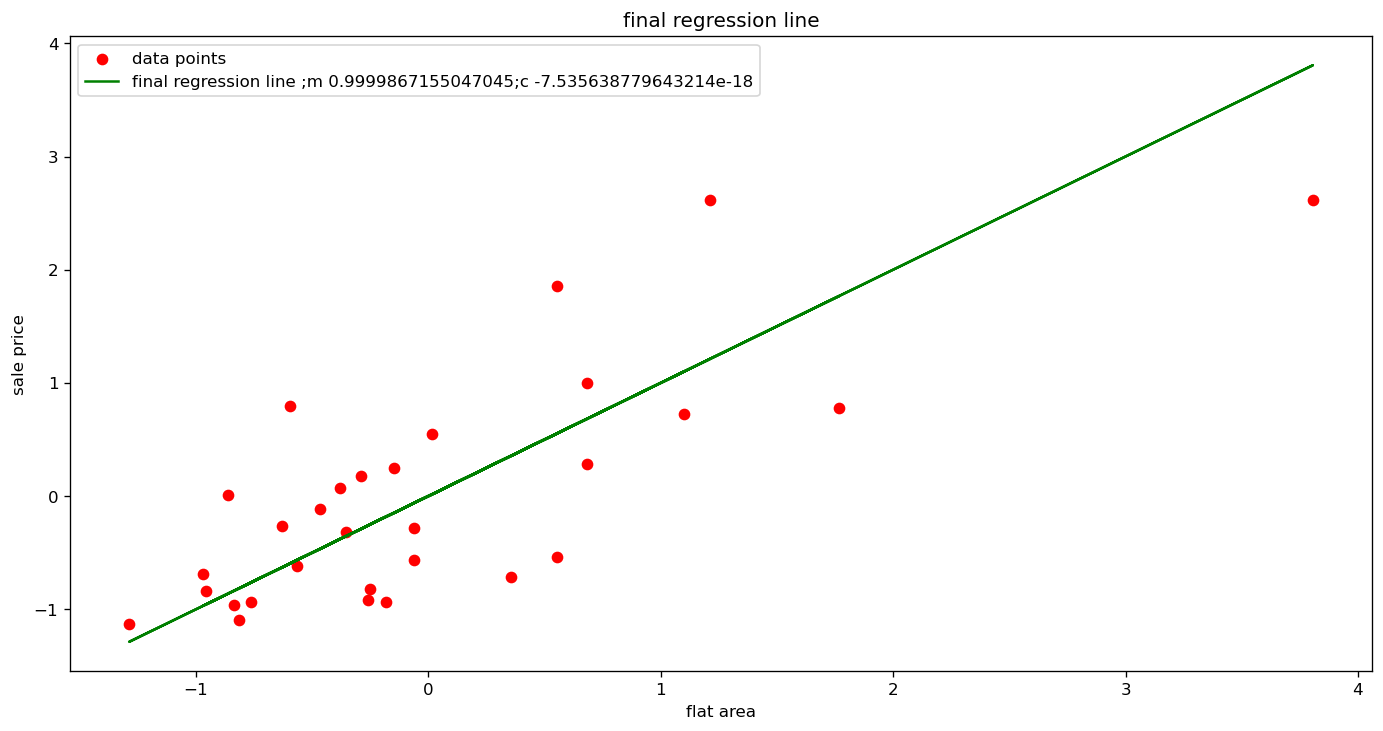

In [26]:
## defining and reshaping the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sale_price=scaler.fit_transform(sample_data["Sale_Price"].values.reshape(-1,1))
Flat_area=scaler.fit_transform(sample_data['Flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter =1000
cost_old =0
alpha =.01


## step 1: initializtion of the value of m,c
m,c=param_init(sale_price)

## Gradient decent in action
for i in range(0,max_iter):
    
    
    ## step 2:generating preditions
    preditions=generate_predictions(m,c,Flat_area)


    ## step 3:calculating cost
    cost_new=compute_cost( preditions ,  sale_price)
    

    ## checking if GD converged
    if (abs(cost_new - cost_old) < 10**(-7)):
        break
  
    
    
    
    
    ## calculating gradients
    Gm,Gc=gradients(preditions,sale_price,Flat_area)


    ##step 4:updating parameter m and c
    m,c=param_update(m,c,Gm,Gc,alpha)



    ## displaying result after 20 iterations
    if i%20==0:
        print("After Iteration",i,":m=",m,";C=",c,';cost=',cost_new)

    ## updating cost_old
    cost_old=cost_new


##final results
result(m,c,Flat_area,sale_price,
       cost_new,preditions,i)